In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bike_data = pd.read_csv("./datasets/bike_sharing_daily.csv", index_col=0)

bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_data["dteday"] = pd.DatetimeIndex(bike_data["dteday"])

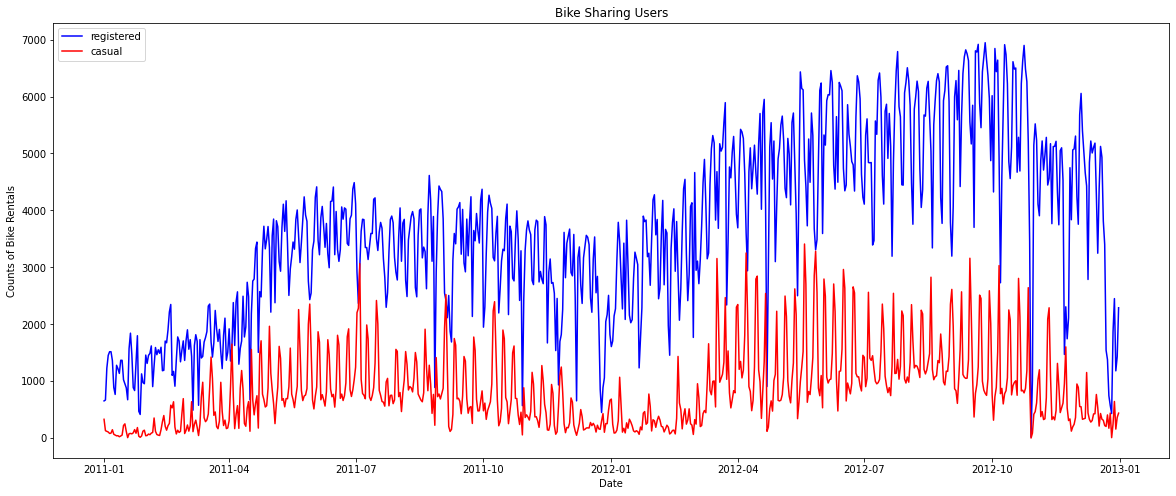

In [4]:
plt.figure(figsize=(20, 8))

plt.plot(bike_data["dteday"], bike_data["registered"], color="b", label="registered")

plt.plot(bike_data["dteday"], bike_data["casual"], color="r", label="casual")

plt.legend(loc="upper left")

plt.title("Bike Sharing Users")
plt.xlabel("Date")
plt.ylabel("Counts of Bike Rentals")

plt.show()

In [5]:
years_df = bike_data.groupby("yr", as_index=False).mean()

years_df[["yr", "cnt"]]

,yr,cnt
0,0,3405.761644
1,1,5599.934426


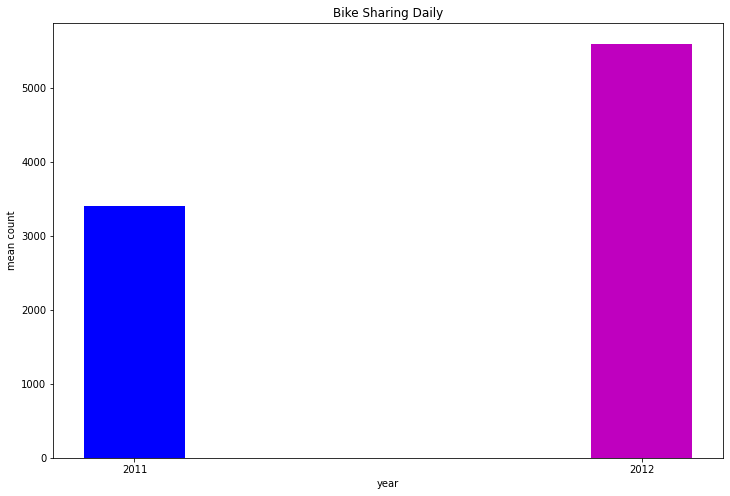

In [6]:
plt.figure(figsize=(12, 8))

colors = ["b", "m"]

plt.bar(years_df["yr"], years_df["cnt"], width=0.2, color=colors)

plt.xticks([0, 1], ["2011", "2012"])

plt.title("Bike Sharing Daily")
plt.xlabel("year")
plt.ylabel("mean count")

plt.show()

In [7]:
days = bike_data.groupby("workingday", as_index=False).mean()

days[["cnt"]]

,cnt
0,4330.168831
1,4584.820000


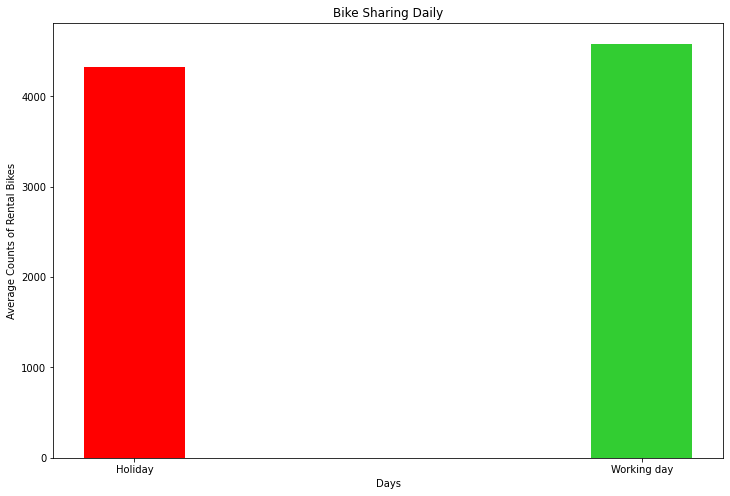

In [8]:
plt.figure(figsize=(12, 8))

plt.bar(days["workingday"], days["cnt"], width=0.2, color=["red", "limegreen"])

plt.xticks([0, 1], ["Holiday", "Working day"])

plt.title("Bike Sharing Daily")
plt.xlabel("Days")
plt.ylabel("Average Counts of Rental Bikes")

plt.show()

In [9]:
year_data = bike_data.loc[bike_data["yr"] == 1]

year_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [10]:
month_df = year_data[["mnth", "cnt"]].groupby("mnth", as_index=False).mean()

month_df

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


In [11]:
month_df["mnth"].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
    inplace=True,
)

month_df

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,Mar,5318.548387
3,Apr,5807.466667
4,May,6318.225806
5,Jun,6761.000000
6,Jul,6567.967742
7,Aug,6919.451613
8,Sep,7285.766667
9,Oct,6414.225806


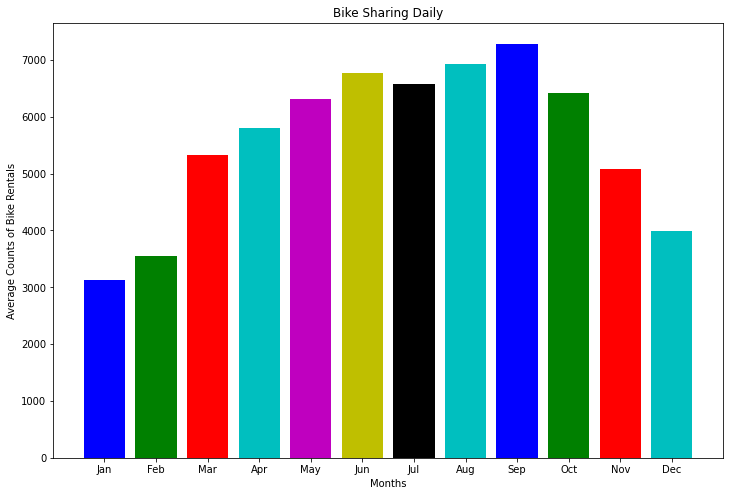

In [12]:
colors = ["b", "g", "r", "c", "m", "y", "k", "c"]

plt.figure(figsize=(12, 8))

plt.bar(month_df["mnth"], month_df["cnt"], color=colors)

plt.title("Bike Sharing Daily")
plt.xlabel("Months")
plt.ylabel("Average Counts of Bike Rentals")

plt.show()

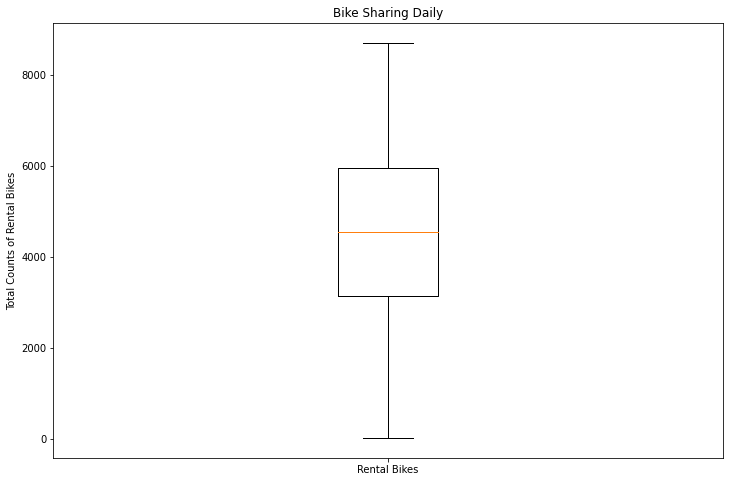

In [13]:
plt.figure(figsize=(12, 8))

plt.boxplot(bike_data["cnt"])

plt.xticks([1], ["Rental Bikes"])
plt.title("Bike Sharing Daily")
plt.ylabel("Total Counts of Rental Bikes")

plt.show()

In [14]:
s_bike_data = bike_data[["casual", "registered"]]
s_bike_data.head()

,casual,registered
instant,,
1,331,654
2,131,670
3,120,1229
4,108,1454
5,82,1518


In [15]:
columns = s_bike_data.columns

columns

Index(['casual', 'registered'], dtype='object')

In [16]:
bike_data_array = s_bike_data.values

bike_data_array

array([[ 331,  654],
       [ 131,  670],
       [ 120, 1229],
       ...,
       [ 159, 1182],
       [ 364, 1432],
       [ 439, 2290]], dtype=int64)

In [17]:
colors = ["g", "m"]

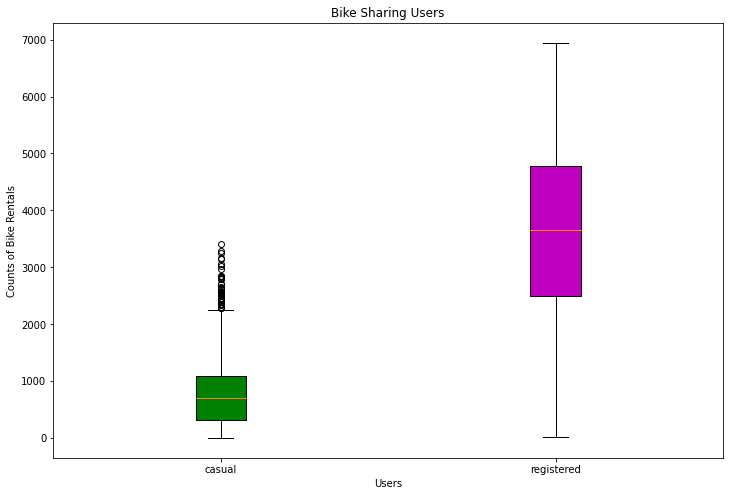

In [18]:
plt.figure(figsize=(12, 8))

bp = plt.boxplot(bike_data_array, patch_artist=True, labels=columns)

for i in range(len(bp["boxes"])):
    bp["boxes"][i].set(facecolor=colors[i])

plt.title("Bike Sharing Users")
plt.xlabel("Users")
plt.ylabel("Counts of Bike Rentals")

plt.show()

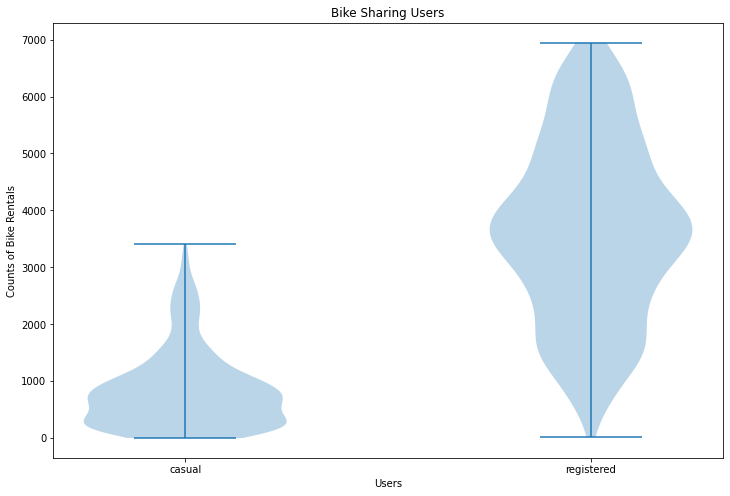

In [19]:
plt.figure(figsize=(12, 8))

bp = plt.violinplot(bike_data_array)

plt.xticks([1, 2], columns)

plt.title("Bike Sharing Users")
plt.xlabel("Users")
plt.ylabel("Counts of Bike Rentals")

plt.show()

In [20]:
season_data = bike_data[["season", "cnt"]]

season_data.sample(5)

,season,cnt
instant,,
304,4,3669
246,3,4484
69,1,623
102,2,2034
666,4,7852


In [21]:
season_group = season_data.groupby("season", as_index=False).sum()

season_group.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [22]:
season_group["season"].replace(
    [1, 2, 3, 4], ["spring", "summer", "fall", "winter"], inplace=True
)

season_group

,season,cnt
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


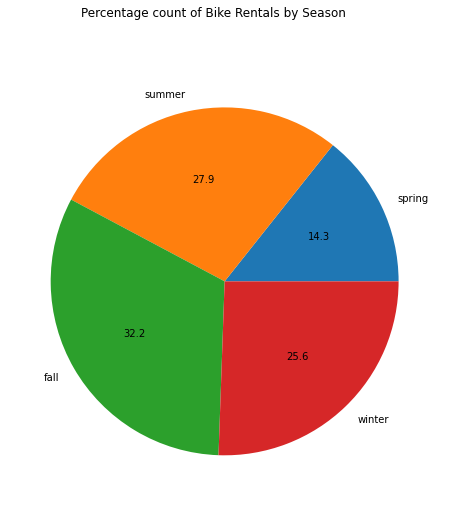

In [23]:
plt.figure(figsize=(12, 8))

plt.pie(season_group["cnt"], labels=season_group["season"], autopct="%.1f")

plt.suptitle("Percentage count of Bike Rentals by Season")

plt.show()

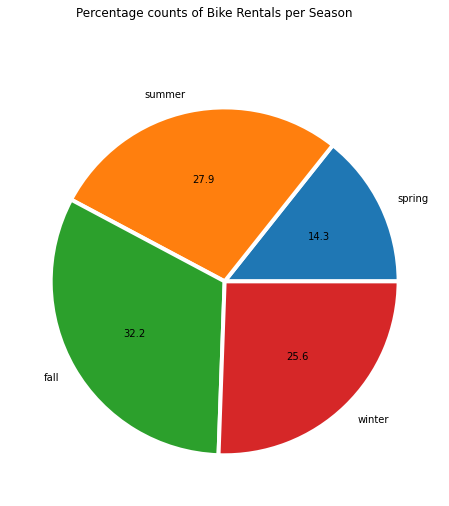

In [24]:
plt.figure(figsize=(12, 8))

plt.pie(
    season_group["cnt"],
    labels=season_group["season"],
    autopct="%.1f",
    wedgeprops={"linewidth": 4, "edgecolor": "white"},
)

plt.suptitle("Percentage counts of Bike Rentals per Season")

plt.show()

In [25]:
explode_max = (0, 0, 0.2, 0)
explode_min = (0.2, 0, 0, 0)

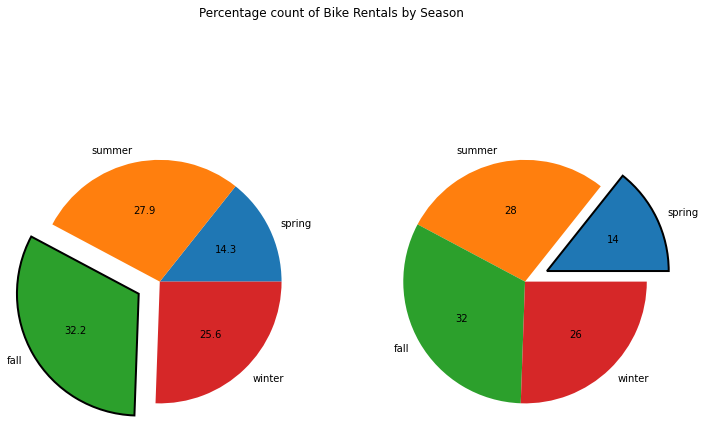

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

wedges, texts, autotexts = ax1.pie(
    season_group["cnt"],
    labels=season_group["season"],
    autopct="%.1f",
    explode=explode_max,
)

wedges[2].set(edgecolor="k", linewidth=2)

wedges, text, autotexts = ax2.pie(
    season_group["cnt"],
    labels=season_group["season"],
    autopct="%.lf",
    explode=explode_min,
)

wedges[0].set(edgecolor="k", linewidth=2)

plt.suptitle("Percentage count of Bike Rentals by Season")

plt.show();